In [1]:
import sys
sys.path.insert(0, '../third/xgboost/python-package/build/lib/')

In [2]:
%pylab inline
import pandas as pd
import xgboost as xgb

Populating the interactive namespace from numpy and matplotlib


In [3]:
xgb.__version__

'0.6'

In [4]:
df=pd.read_csv('../input/newtrain.csv',index_col=0)

In [5]:
df=df.loc[np.random.permutation(df.index)]

In [7]:
df1=df[:len(df)/2]
df2=df[len(df)/2:]
df1.shape,df2.shape,df.shape

((297606, 63), (297606, 63), (595212, 63))

In [8]:
df1.to_csv("../input/newtrain_part1.csv")
df2.to_csv("../input/newtrain_part2.csv")

In [9]:
df=df1

In [10]:
trainx=df.drop(['target'],axis=1)
trainy=df['target']

In [11]:
trainx.shape

(297606, 62)

In [12]:
trainx.shape

(297606, 62)

In [13]:
297606*0.8

238084.80000000002

In [14]:
split = 238084
x_train, y_train, x_valid, y_valid = trainx[:split], trainy[:split], trainx[split:], trainy[split:]

print('Building DMatrix...')

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

d_all=xgb.DMatrix(trainx, label=trainy)


Building DMatrix...


In [16]:
print('Training ...')

params = {}
params['eta'] = 0.02
params['objective'] = 'binary:logistic'
#params['objective'] = 'reg:abs'
params['eval_metric'] = 'auc'
params['max_depth'] = 6
params['nthread']=8
params['silent'] = 1
#params['gamma'] = 2
#params['min_child_weight']=50
params['tree_method']='hist'

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
%time clf = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=50,verbose_eval=20)

Training ...
[0]	train-auc:0.611521	valid-auc:0.600177
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[20]	train-auc:0.631343	valid-auc:0.617064
[40]	train-auc:0.636939	valid-auc:0.619277
[60]	train-auc:0.639046	valid-auc:0.620224
[80]	train-auc:0.64314	valid-auc:0.621517
[100]	train-auc:0.648841	valid-auc:0.624952
[120]	train-auc:0.655034	valid-auc:0.626581
[140]	train-auc:0.662186	valid-auc:0.628615
[160]	train-auc:0.669078	valid-auc:0.629967
[180]	train-auc:0.675417	valid-auc:0.630998
[200]	train-auc:0.682669	valid-auc:0.632294
[220]	train-auc:0.689754	valid-auc:0.633388
[240]	train-auc:0.696581	valid-auc:0.634911
[260]	train-auc:0.702424	valid-auc:0.635513
[280]	train-auc:0.707959	valid-auc:0.635684
[300]	train-auc:0.714841	valid-auc:0.63624
[320]	train-auc:0.721156	valid-auc:0.63648
[340]	train-auc:0.727031	valid-auc:0.63689
[360]	train-auc:0.732684	valid-auc:0.636849
[380]	train-auc:0.

In [17]:
clf.best_ntree_limit

349

In [18]:
print clf.get_dump(dump_format='text')[7]

0:[ps_car_13_float<0.968992] yes=1,no=2,missing=1
	1:[ps_ind_17_bin<1] yes=3,no=4,missing=3
		3:[ps_reg_02<6] yes=7,no=8,missing=7
			7:[ps_car_13_float<0.748152] yes=15,no=16,missing=15
				15:[ps_ind_03<1] yes=31,no=32,missing=31
					31:[ps_car_11_cat<8] yes=61,no=62,missing=61
						61:leaf=-0.00781319
						62:leaf=-0.0321699
					32:[ps_ind_15<8] yes=63,no=64,missing=63
						63:leaf=-0.033398
						64:leaf=-0.0339517
				16:[ps_reg_01<8] yes=33,no=34,missing=33
					33:[ps_ind_05_cat<2] yes=65,no=66,missing=65
						65:leaf=-0.0333846
						66:leaf=-0.032019
					34:[ps_calc_09<7] yes=67,no=68,missing=67
						67:leaf=-0.0323216
						68:leaf=-0.0113093
			8:[ps_ind_05_cat<1] yes=17,no=18,missing=17
				17:[ps_car_07_cat<0] yes=35,no=36,missing=35
					35:[ps_ind_01<4] yes=69,no=70,missing=69
						69:leaf=-0.0290158
						70:leaf=-0.0174438
					36:[ps_car_03_cat<0] yes=71,no=72,missing=71
						71:leaf=-0.0329951
						72:leaf=-0.0322722
				18:[ps_car_10_cat<1] yes=37,no=38,m

In [19]:
import json
trees=[json.loads(u) for u in clf.get_dump(dump_format='json')[:clf.best_ntree_limit]]
len(trees)

349

In [20]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [21]:
tree= (trees[7])

In [22]:
g=nx.DiGraph()

In [23]:
def addNode(node):
    g.add_node(node['nodeid'])
    if 'children' in node:
        for u in node['children']:
            addNode(u)
addNode(tree)            

In [24]:
def addEdge(node):
    n1=node['nodeid']
    if 'children' in node:
        for u in node['children']:
            g.add_edge(n1,u['nodeid'])
            addEdge(u)
addEdge(tree)            

/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/spark/anaconda2/lib/python2.7/

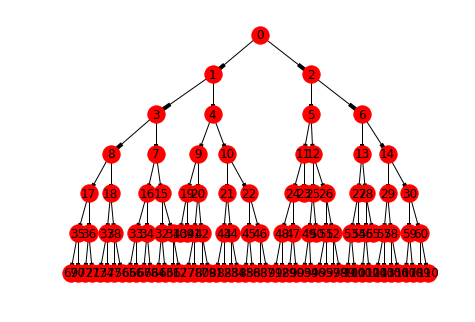

In [25]:
pos=graphviz_layout(g, prog='dot')
nx.draw(g,pos,with_labels=True)

In [26]:
def parse_tree(node):
    if 'leaf' in node:
        return [[]]
    nodeid=node['nodeid']
    split=node['split']
    split_cond=node['split_condition']
    yes=node['yes']
    no=node['no']
    missing=node['missing']
    children1=parse_tree([u for u in node["children"] if u['nodeid']==yes][0])
    children2=parse_tree([u for u in node["children"] if u['nodeid']==no][0])
    cond1=[('yes',split,split_cond)]
    cond2=[('no',split,split_cond)]
    if missing==yes:
        cond1.append(('missing',split))
    elif missing==no:
        cond2.append(('missing',split))
    else:
        raise 2
    cond1=sorted(cond1)
    cond2=sorted(cond2)
    ret1=[ sorted([cond1]+u) for u in children1]
    ret2=[ sorted([cond2]+u) for u in children2]
    return ret1+ret2
    
    

In [27]:
def enumerate_all_conds(tree):
    ret=[]
    cond_list=(parse_tree(tree))
    for cond in cond_list:
        for i in range(len(cond)):
            ret.append(cond[:i+1])
    return ret

In [28]:
cond_list=(enumerate_all_conds(trees[8]))
len(cond_list)

322

In [29]:
cond_list[12]

[[('missing', u'ps_car_13_float'), ('yes', u'ps_car_13_float', 0.968992)]]

In [30]:
all_conds=reduce(lambda u,v: u+v, [enumerate_all_conds(t) for t in trees])
len(all_conds)

124452

In [31]:
(cond_list[22])

[[('missing', u'ps_car_13_float'), ('yes', u'ps_car_13_float', 0.968992)],
 [('missing', u'ps_ind_06_bin'), ('yes', u'ps_ind_06_bin', 1)],
 [('missing', u'ps_ind_17_bin'), ('yes', u'ps_ind_17_bin', 1)],
 [('missing', u'ps_reg_02'), ('yes', u'ps_reg_02', 6)],
 [('no', u'ps_ind_05_cat', 2)]]

In [32]:
unique_conds={}
for u in all_conds:
    s=str(u)
    if s not in unique_conds:
        unique_conds[s]=u
unique_conds = list(unique_conds.values())

In [33]:
len(unique_conds)

40236

In [34]:
df.shape[0]*len(unique_conds)*64.0/1024**3

713.73432970047

In [35]:
df.shape[0]*len(unique_conds)*16.0/1024**3

178.4335824251175

In [36]:
df.shape[0]*100000.*64/1024**3

1773.8699913024902

In [37]:
import cPickle as pickle
pickle.dump(unique_conds,open("xgb_conds.pkl",'wb'))

In [38]:
def value_cond_tuple (df,cond):
    #print cond
    col=cond[1]
    if cond[0]=='missing':
        return np.isnan(df[col])
    else:
        split_val=cond[2]
        if cond[0]=='yes':
            return df[col]<split_val
        elif cond[0]=='no':
            return df[col]>=split_val
        else:
            raise "never be here"
def value_cond_single(df,conds):
    return reduce(lambda u,v: u | v, [value_cond_tuple(df,cond) for cond in conds])
def value_cond(df,conds):
    return reduce(lambda u,v: u & v, [value_cond_single(df,cond) for cond in conds])
def value_trees(df,trees):
    cond_lists=reduce(lambda u,v: u+v, [enumerate_all_conds(tree) for tree in trees])
    return cond_lists, pd.DataFrame([value_cond(df, conds) for conds in cond_lists]).T

In [40]:
value_cond(df,unique_conds[37]).mean()

0.0012466146515863255

In [41]:
for i in range(100):
    print i, np.round(df['target'][value_cond(df,unique_conds[i])].mean()-0.036447517859182946,3)

0 -0.005
1 0.005
2 0.003
3 0.009
4 0.007
5 0.005
6 -0.003
7 0.17
8 -0.002
9 -0.005
10 -0.008
11 -0.007
12 0.526
13 0.014
14 -0.007
15 -0.018
16 0.044
17 -0.004
18 0.005
19 0.003
20 -0.003
21 0.529
22 -0.007
23 -0.003
24 0.055
25 -0.011
26 -0.006
27 0.014
28 0.019
29 0.014
30 0.024
31 -0.002
32 0.0
33 -0.004
34 -0.001
35 -0.017
36 0.204
37 -0.001
38 0.009
39 0.024
40 -0.008
41 -0.003
42 -0.012
43 -0.006
44 -0.005
45 -0.003
46 -0.012
47 0.026
48 -0.016
49 -0.006
50 0.003
51 0.128
52 0.08
53 -0.007
54 -0.01
55 0.018
56 0.003
57 0.002
58 0.006
59 0.017
60 -0.002
61 0.03
62 -0.004
63 -0.014
64 0.02
65 0.04
66 0.142
67 -0.0
68 -0.007
69 -0.004
70 0.006
71 0.008
72 0.004
73 0.009
74 0.039
75 -0.005
76 0.012
77 -0.013
78 -0.002
79 -0.036
80 -0.014
81 0.009
82 -0.014
83 -0.007
84 -0.001
85 -0.01
86 0.006
87 -0.003
88 -0.006
89 -0.01
90 0.027
91 -0.004
92 -0.01
93 -0.01
94 0.028
95 -0.004
96 -0.002
97 -0.01
98 -0.004
99 -0.018
